In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt
%matplotlib inline

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [4]:
score = pd.read_csv('../data/score/lightgbm.csv')

In [5]:
data = pd.read_feather('../data/data/models/valid_data.feather')
data = data[['click_id','next_click']]

In [6]:
feature = score.merge(data, on='click_id')

In [8]:
feature['bucket'] = pd.qcut(data['next_click'], 5)

In [9]:
fpr,tpr, thresh = roc_curve(feature['is_attributed'], feature['next_click'])

In [10]:
2*auc(fpr,tpr) - 1

-0.43643702716483

In [11]:
plot = feature.groupby('bucket')[['score','is_attributed']].mean().reset_index()

In [12]:
plot

,bucket,score,is_attributed
0,"(-1.001, 3.0]",0.059462,0.008603
1,"(3.0, 82.0]",0.008960,0.000160
2,"(82.0, 557.0]",0.018075,0.000615
3,"(557.0, 4291.0]",0.038712,0.000887
4,"(4291.0, 129560.0]",0.064738,0.002181


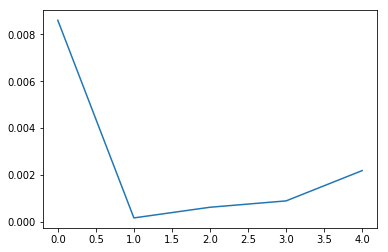

In [14]:
plt.plot(plot[['is_attributed']])